In [1]:
%pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sns
from itertools import cycle, islice
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

# Read Data

In [3]:
df = pd.read_csv("/kaggle/input/iris-datset/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Analyse Data

In [4]:
print("The shape of the dataset is",df.shape)

The shape of the dataset is (150, 6)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Check if Data Contains Null or Nan Values

In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Check if Data Contains Duplicated Values

In [9]:
print("The number of duplicated values is:",len(df)-len(df.drop_duplicates()))

The number of duplicated values is: 0


# Define Features and Target

In [10]:
features = df.iloc[:,[1,2,3,4]]
target = df.iloc[:,[5]]

# Correlation between Features

In [11]:
correlationMatrix = features.corr().abs()
upperTriangle = correlationMatrix.where(np.triu(np.ones(correlationMatrix.shape),k=1).astype(bool))
upperTriangle

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,NaN,0.109369,0.871754,0.817954
SepalWidthCm,NaN,NaN,0.420516,0.356544
PetalLengthCm,NaN,NaN,NaN,0.962757
PetalWidthCm,NaN,NaN,NaN,NaN


# Scatter Plot of Data

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


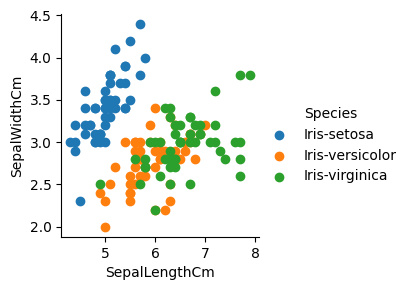

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


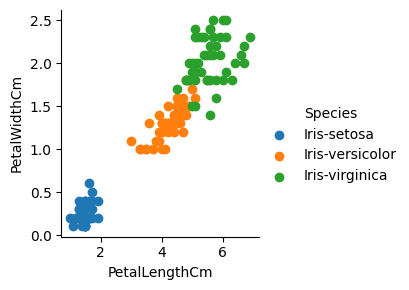

In [12]:
sns.FacetGrid(df,hue='Species').map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()
plt.show()

sns.FacetGrid(df,hue='Species').map(plt.scatter,'PetalLengthCm','PetalWidthCm').add_legend()
plt.show()

# Check if Data is Imbalanced

<Axes: xlabel='Species', ylabel='Count'>

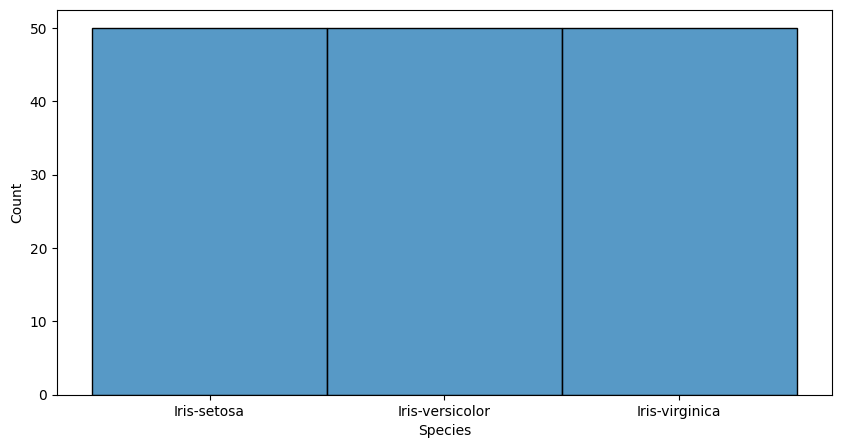

In [13]:
fig = plt.figure(figsize=(10,5))
sns.histplot(target, x="Species")

# Split Data into Training and Testing

In [19]:
train_x,test_x, train_y, test_y = train_test_split(np.array(features), np.array(target), test_size=0.1, random_state=1,stratify=target)

# Training and Predicting Using Decision Tree

In [20]:
DT_model = DecisionTreeClassifier()
DT_model.fit(train_x, train_y)
y_pred = DT_model.predict(test_x)

# Comparing Actual Vs Predicted Results

In [21]:
df_compare = pd.DataFrame({'Actual':test_y.reshape(1,-1)[0], 'Predicted':y_pred})  
df_compare

,Actual,Predicted
0,Iris-virginica,Iris-versicolor
1,Iris-versicolor,Iris-versicolor
2,Iris-virginica,Iris-virginica
3,Iris-setosa,Iris-setosa
4,Iris-versicolor,Iris-versicolor
5,Iris-setosa,Iris-setosa
6,Iris-setosa,Iris-setosa
7,Iris-virginica,Iris-virginica
8,Iris-versicolor,Iris-versicolor
9,Iris-virginica,Iris-virginica


# Obtain Accuracy

In [23]:
print("The accuracy is:",accuracy_score(test_y,y_pred)*100)

The accuracy is: 93.33333333333333


# Evaluation Using Confusion Matrix

In [24]:
label_name = ['Iris_setosa','Iris_versicolor','Iris_virginica']

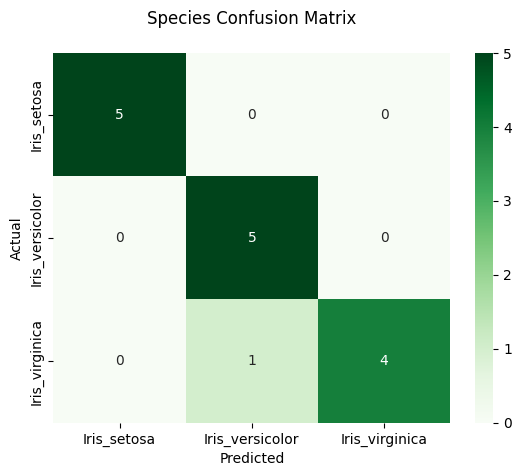

In [26]:
ConfusionMatrix = confusion_matrix(test_y,y_pred)
sns.heatmap(ConfusionMatrix, annot=True, fmt="d", cmap="Greens", xticklabels=label_name, yticklabels=label_name)
plt.title("Species Confusion Matrix\n")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Evaluation Using Classification Report

In [27]:
print("Species Classification Report of the \n")
print(classification_report(test_y, y_pred,target_names= label_name))

Species Classification Report of the 

                 precision    recall  f1-score   support

    Iris_setosa       1.00      1.00      1.00         5
Iris_versicolor       0.83      1.00      0.91         5
 Iris_virginica       1.00      0.80      0.89         5

       accuracy                           0.93        15
      macro avg       0.94      0.93      0.93        15
   weighted avg       0.94      0.93      0.93        15



# Decision Tree Visaualizor

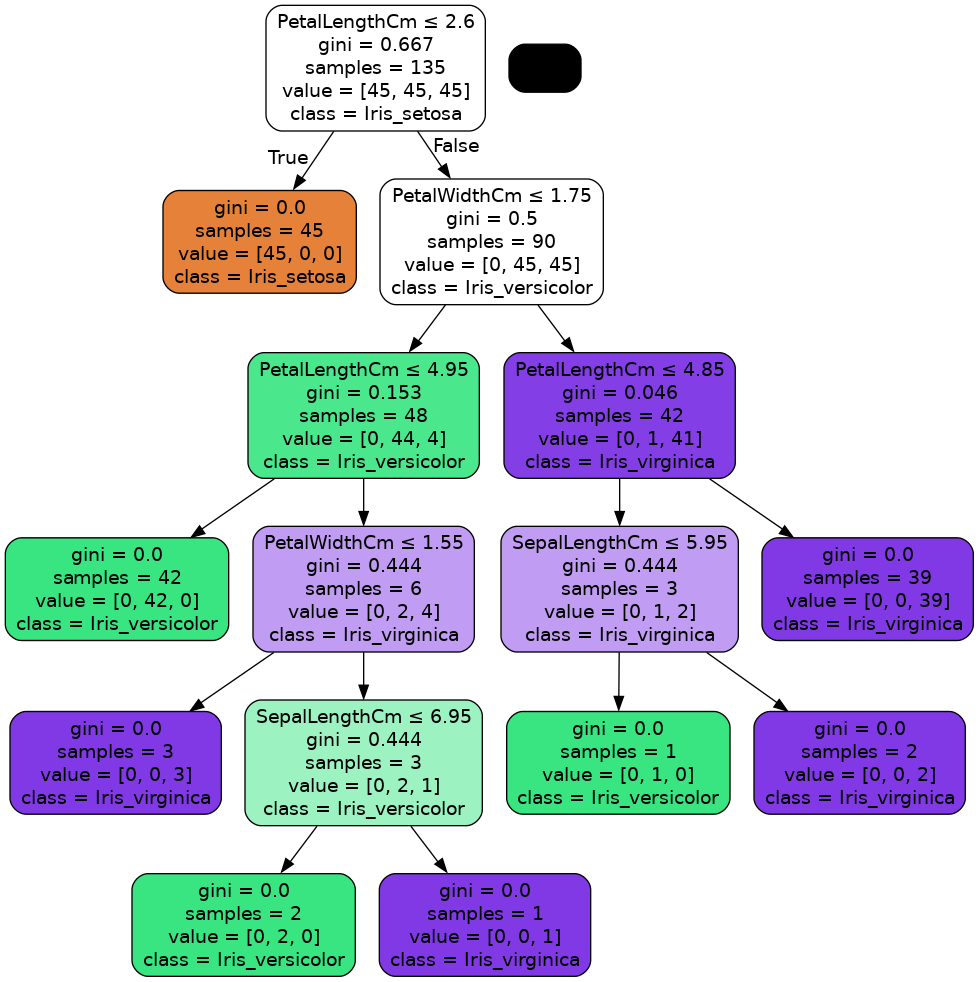

In [28]:
dot_data=StringIO()
export_graphviz(DT_model,out_file=dot_data,rounded=True,filled=True,special_characters=True,feature_names=features.columns.tolist(),class_names=label_name)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("Iris Decision Tree.png")
Image(graph.create_png())
